In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Working with cancer data first

In [68]:
df = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/stroke_data.csv')
df.head()

,CensusTract,Stroke_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.7,3.4,4.1,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,3.0,2.6,3.5,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.8,3.5,4.0,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.9,2.7,3.2,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.7,3.3,4.2,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


Dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

In [69]:
df.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df.set_index('CensusTract', inplace=True)
df.head()

,Stroke_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.7,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,3.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.8,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.9,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.7,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


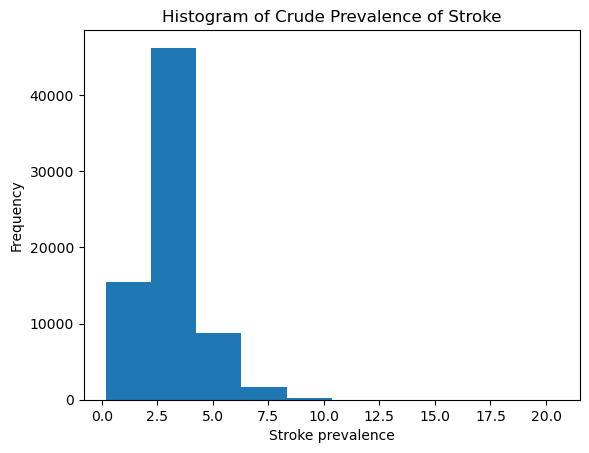

In [70]:
_ = plt.hist(df['Stroke_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Stroke prevalence')
_ = plt.title('Histogram of Crude Prevalence of Stroke')

Visualizing parameters to see any clear correlations.

In [71]:
df.corr()

,Stroke_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Stroke_prevalence,1.000000,-0.004465,-0.102729,-0.096937,0.021976,0.015371,-0.076793,0.185011,-0.043192,0.099476,-0.081615,0.001181
PM25,-0.004465,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.102729,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.096937,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,0.021976,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,0.015371,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.076793,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.185011,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.043192,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.099476,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


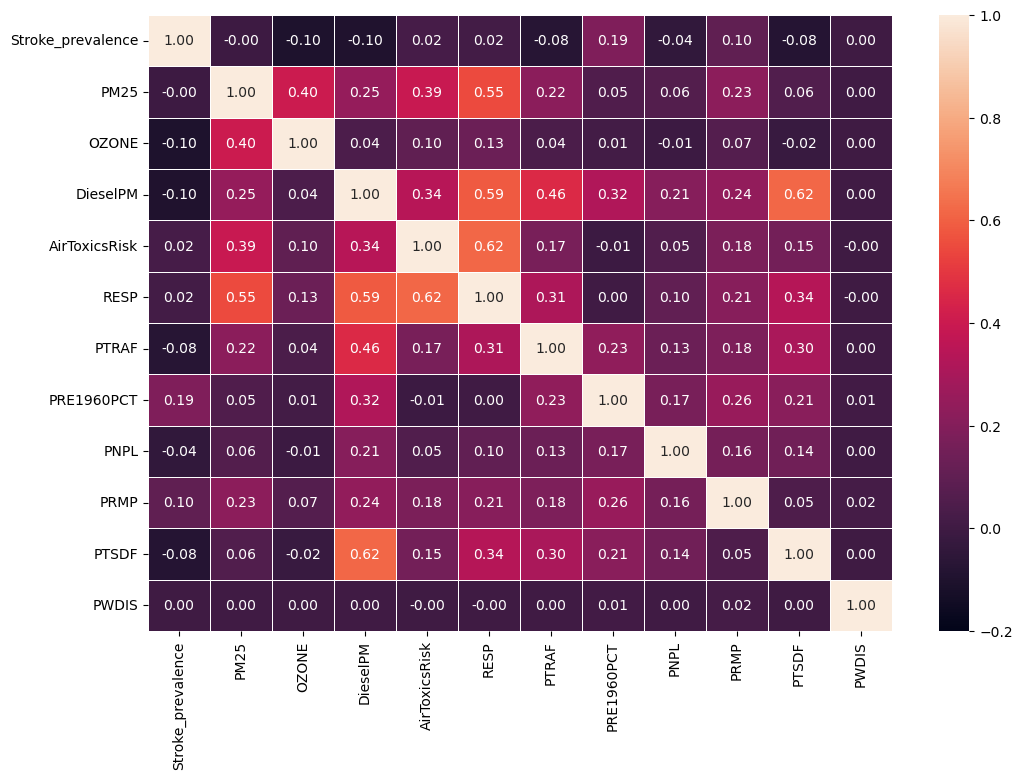

In [72]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)